## EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [25]:
df2015 = pd.read_csv('Data/TouristArrival2015.csv')
df2016 = pd.read_csv('Data/TouristArrival2016.csv')
df2017 = pd.read_csv('Data/TouristArrival2017.csv')
df2018 = pd.read_csv('Data/TouristArrival2018.csv')
df2019 = pd.read_csv('Data/TouristArrival2019.csv')
df2020 = pd.read_csv('Data/TouristArrival2020.csv')
df2021 = pd.read_csv('Data/TouristArrival2021.csv')
df2022 = pd.read_csv('Data/TouristArrival2022.csv')
dfQuart = pd.read_csv('Data/TourismArrival2020-2021(Quarterly).csv')
dfAirPassenger = pd.read_csv('Data/thailand_air_passengers.csv')
dfDT = pd.read_csv('Data/thailand_domestic_tourism_2019_2023_ver2.csv')
dfDT

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,ratio_tourist_stay,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,ratio_tourist_stay,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,ratio_tourist_stay,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,ratio_tourist_stay,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,ratio_tourist_stay,79.31
...,...,...,...,...,...,...,...
30795,2022-12-01,อุบลราชธานี,Ubon Ratchathani,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,2480000.00
30796,2022-12-01,สกลนคร,Sakon Nakhon,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,3520000.00
30797,2022-12-01,ยโสธร,Yasothon,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,210000.00
30798,2022-12-01,อำนาจเจริญ,Amnat Charoen,ภาคตะวันออกเฉียงเหนือ,east_northeast,revenue_foreign,660000.00


In [26]:
df2018["year"] = 2018
df2019["year"] = 2019
df2020["year"] = 2020
df2017["year"] = 2017
df2016["year"] = 2016
df2015["year"] = 2015
df2021["year"] = 2021
df2022["year"] = 2022


# print(df2015.shape)
# print(df2016.shape)
# print(df2017.shape)
# print(df2018.shape)
# print(df2020.shape)
# print(dfAirPassenger.shape)
# print(dfDT.shape)
# print(df2015.dtypes)
# print(df2016.dtypes)
# print(df2017.dtypes)
# print(df2018.dtypes)
# print(df2019.dtypes)
# print(df2020.dtypes)
# print(df2021.dtypes)
# print(df2022.dtypes)
print(dfQuart.dtypes)
print(dfAirPassenger.dtypes)
print(dfDT.dtypes)
dfList = [df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022, dfQuart]

Country of Residence             object
No. of Arrivals                  object
Length of Stay(Days)            float64
Per Capita Spending($US/Day)     object
Tourism Receipts(Mil. $US)       object
Region                           object
Year                             object
dtype: object
Entity                                object
Code                                  object
Year                                   int64
Air transport, passengers carried    float64
dtype: object
date              object
province_thai     object
province_eng      object
region_thai       object
region_eng        object
variable          object
value            float64
dtype: object


In [27]:
toChange = ['No. of Arrivals', 'Length of Stay(Days)', 'Per Capita Spending(Baht/Day)', 'Tourism Receipts(Mil. Baht)', 'Tourism Receipts(Mil. $US)']
for i, df in enumerate(dfList):
    for temp in toChange:
        try:
            df[temp] = df[temp].str.replace(",", "")
            df[temp] = pd.to_numeric(df[temp], errors="coerce")
        except:
            continue
    dfList[i] = df
    missing_values = df.isna()
    missing_counts = df.isna().sum()
    total_missing = df.isna().sum().sum()
    print(total_missing)
    print('-----------------------------')

print(df2015.dtypes)
print(df2016.dtypes)
print(df2017.dtypes)
print(df2018.dtypes)
print(df2019.dtypes)
print(df2020.dtypes)
print(df2021.dtypes)
print(df2022.dtypes)
print(df2021)

dfQuart = dfList[8]
dfList.pop()


0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
0
-----------------------------
Country of Residence              object
No. of Arrivals                    int64
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)    float64
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)      float64
Tourism Receipts(Mil. $US)       float64
Region                            object
year                               int64
dtype: object
Country of Residence              object
No. of Arrivals                    int64
Length of Stay(Days)             float64
Per Capita Spending(Baht/Day)    float64
Per Capita Spending($US/Day)     float64
Tourism Receipts(Mil. Baht)      float64
Tourism Receipts(Mil. $US)       float64
Region                            object
y

,Country of Residence,No. of Arrivals,Length of Stay(Days),Per Capita Spending($US/Day),Tourism Receipts(Mil. $US),Region,Year
0,Brunei,2435,9.48,"7,147.43",164.99,Asean,Q1/2020
1,Cambodia,163370,8.30,"7,105.47",9634.81,Asean,Q1/2020
2,Indonesia,96781,6.12,"4,340.94",2571.13,Asean,Q1/2020
3,Laos,382215,4.97,"6,196.30",11770.54,Asean,Q1/2020
4,Malaysia,612688,4.86,"4,298.47",12799.37,Asean,Q1/2020
...,...,...,...,...,...,...,...
419,Saudi Arabia,457,20.05,"3,599.96",32.99,Middle East,Q4/2021
420,U.A.E.,3091,13.90,"3,366.68",144.62,Middle East,Q4/2021
421,Others in Middle East,5562,26.04,"6,086.69",881.42,Middle East,Q4/2021
422,South Africa,598,43.42,"3,472.73",90.18,Africa,Q4/2021


In [28]:
for i, df in enumerate(dfList):
    df = df.drop('Per Capita Spending(Baht/Day)', axis=1)
    df = df.drop('Tourism Receipts(Mil. Baht)', axis=1)
    new_row = ['Other', df["No. of Arrivals"].sum(), df['Length of Stay(Days)'].mean(), df['Per Capita Spending($US/Day)'].mean()
               , df['Tourism Receipts(Mil. $US)'].sum(), 'Total', df['year'][1]]
    print(new_row)
        # new_row = {"Country of Residence": 'Other', 
        #        "No. of Arrivals": df["No. of Arrivals"].sum(), 
        #        'Length of Stay(Days)': df['Length of Stay(Days)'].mean(), 
        #        'Per Capita Spending(Baht/Day)': df['Per Capita Spending(Baht/Day)'].mean(), 
        #        'Per Capita Spending($US/Day)': df['Per Capita Spending($US/Day)'].mean(), 
        #        'Tourism Receipts(Mil. Baht)': df['Tourism Receipts(Mil. Baht)'].sum(), 
        #        'Tourism Receipts(Mil. $US)': df['Tourism Receipts(Mil. $US)'].sum(), 
        #        'Region': 'Total', 
        #        'year': df['year'][1]}
    df.loc[len(df.index)] = new_row
    dfList[i] = df
    # print(df)
# print(dfList[0])
dfNationality = pd.concat([dfList[0], dfList[1], dfList[2], dfList[3], dfList[4], dfList[5], dfList[6], dfList[7]], ignore_index=True)
# dfNationality2 = pd.concat([df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022], ignore_index=True)
# dfDict['integrated']=dfNationality
numList = ['No. of Arrivals', 'Length of Stay(Days)', 'Per Capita Spending($US/Day)', 'Tourism Receipts(Mil. $US)']
# dfList[8]
# dfNationality
# dfNationality2

['Other', 21369792, 12.264716981132077, 146.5701886792453, 32664.619999999995, 'Total', 2015]
['Other', 32529588, 11.941320754716982, 148.78283018867924, 46274.72, 'Total', 2016]
['Other', 35591978, 12.191509433962263, 159.79698113207547, 53951.22999999999, 'Total', 2017]
['Other', 38178194, 11.969811320754715, 166.7988679245283, 58066.740000000005, 'Total', 2018]
['Other', 39916251, 11.920188679245282, 167.96679245283016, 61571.909999999996, 'Total', 2019]
['Other', 6725193, 14.442452830188682, 127.25811320754715, 11353.56, 'Total', 2020]
['Other', 510767, 44.457924528301895, 74.84396226415095, 3067.05, 'Total', 2021]
['Other', 11065226, 16.109622641509432, 101.4932075471698, 13736.439999999999, 'Total', 2022]


In [29]:
import matplotlib.pyplot as plt

Regions = dfNationality['Region'].unique().tolist()
Countries = dfNationality['Country of Residence'].unique().tolist()
Years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
print(Regions)
print(Countries)
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
# i=0
# for field in numList:
#     print(field)
#     # print(dfNationality2[field])
#     row = i // 3
#     col = i % 3
#     axes[row, col].boxplot(dfNationality[field])
#     axes[row, col].set_title(field)
#     i+=1
# plt.show()

['Asean', 'East Asia', 'Europe', 'The Americas', 'South Asia', 'Oceania', 'Middle East', 'Africa', 'Total']
['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Vietnam', 'China', 'Hong Kong', 'Japan', 'Korea', 'Taiwan', 'Others in East Asia', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Italy', 'Netherlands', 'Norway', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'East Europe', 'Others in Europe', 'Argentina', 'Brazil', 'Canada', 'USA', 'Others  in America', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka', 'Others in South Asia', 'Australia', 'New Zealand', 'Others  in Ociania', 'Egypt', 'Israel', 'Kuwait', 'Saudi Arabia', 'U.A.E.', 'Others in Middle East', 'South  Africa', 'Others in Africa', 'Other']


<Figure size 3500x1800 with 0 Axes>

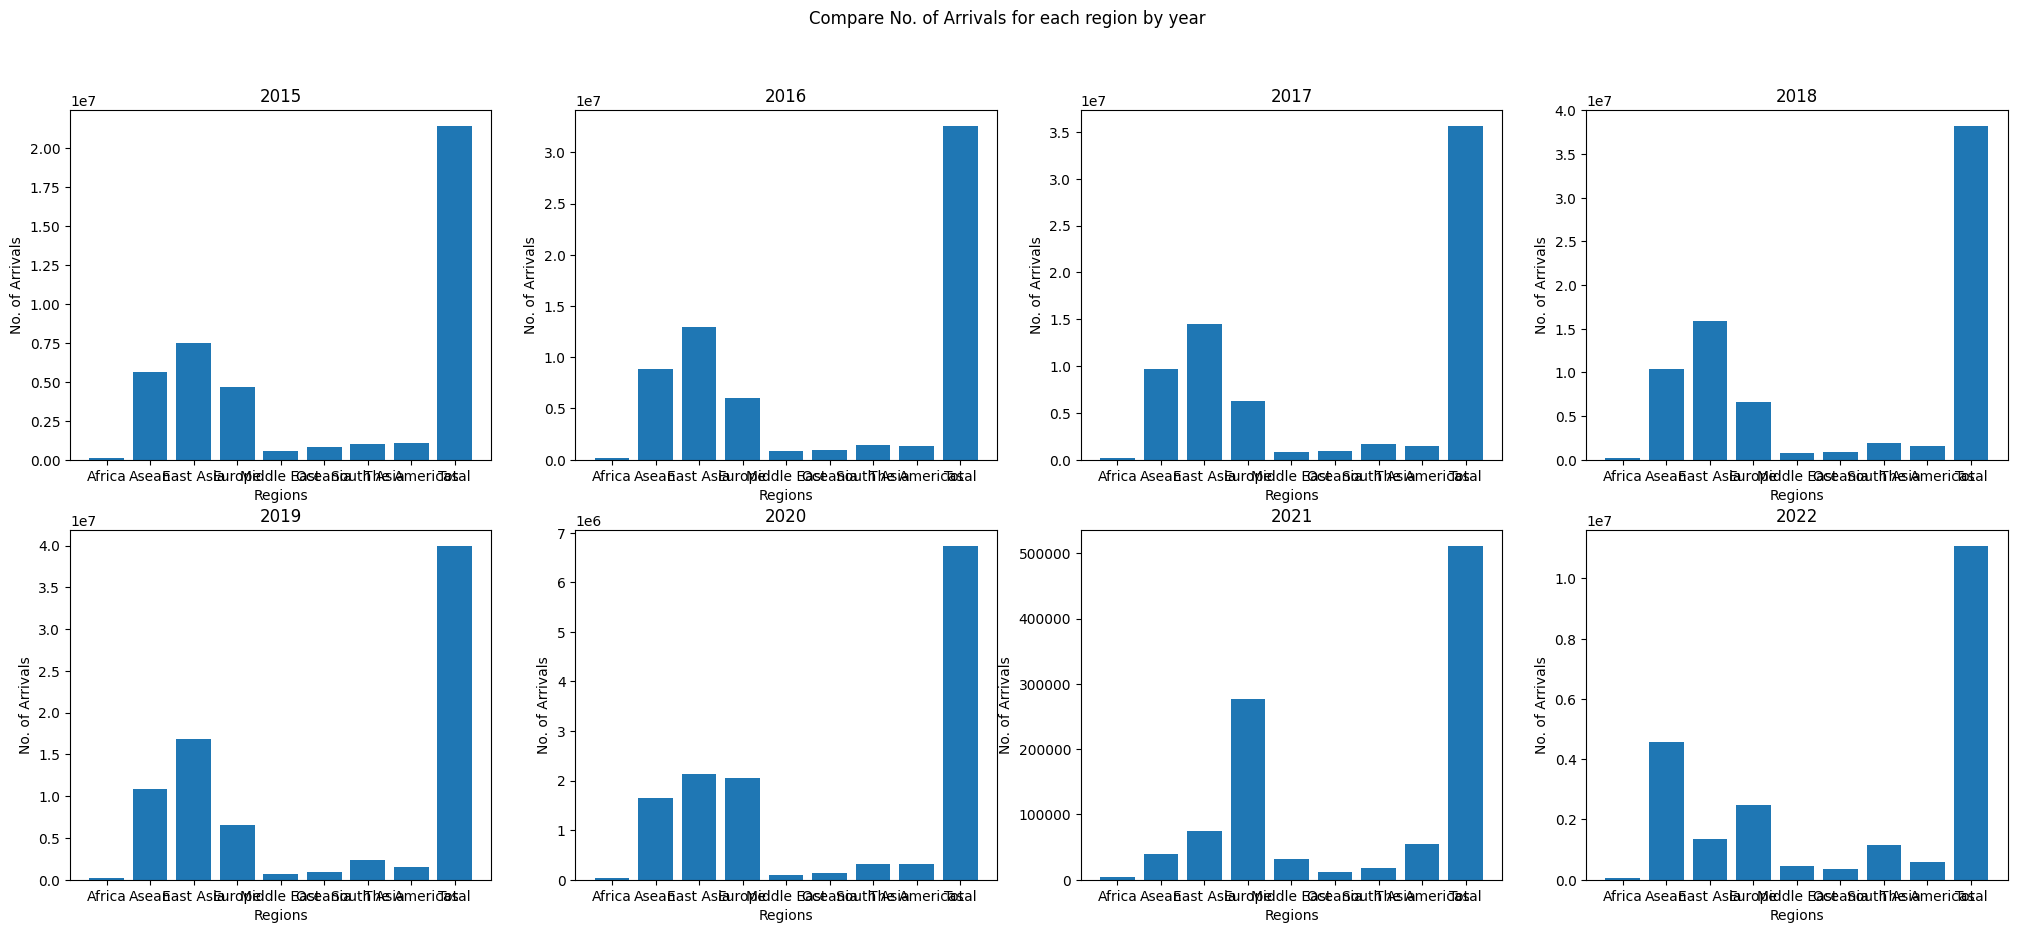

<Figure size 3000x1800 with 0 Axes>

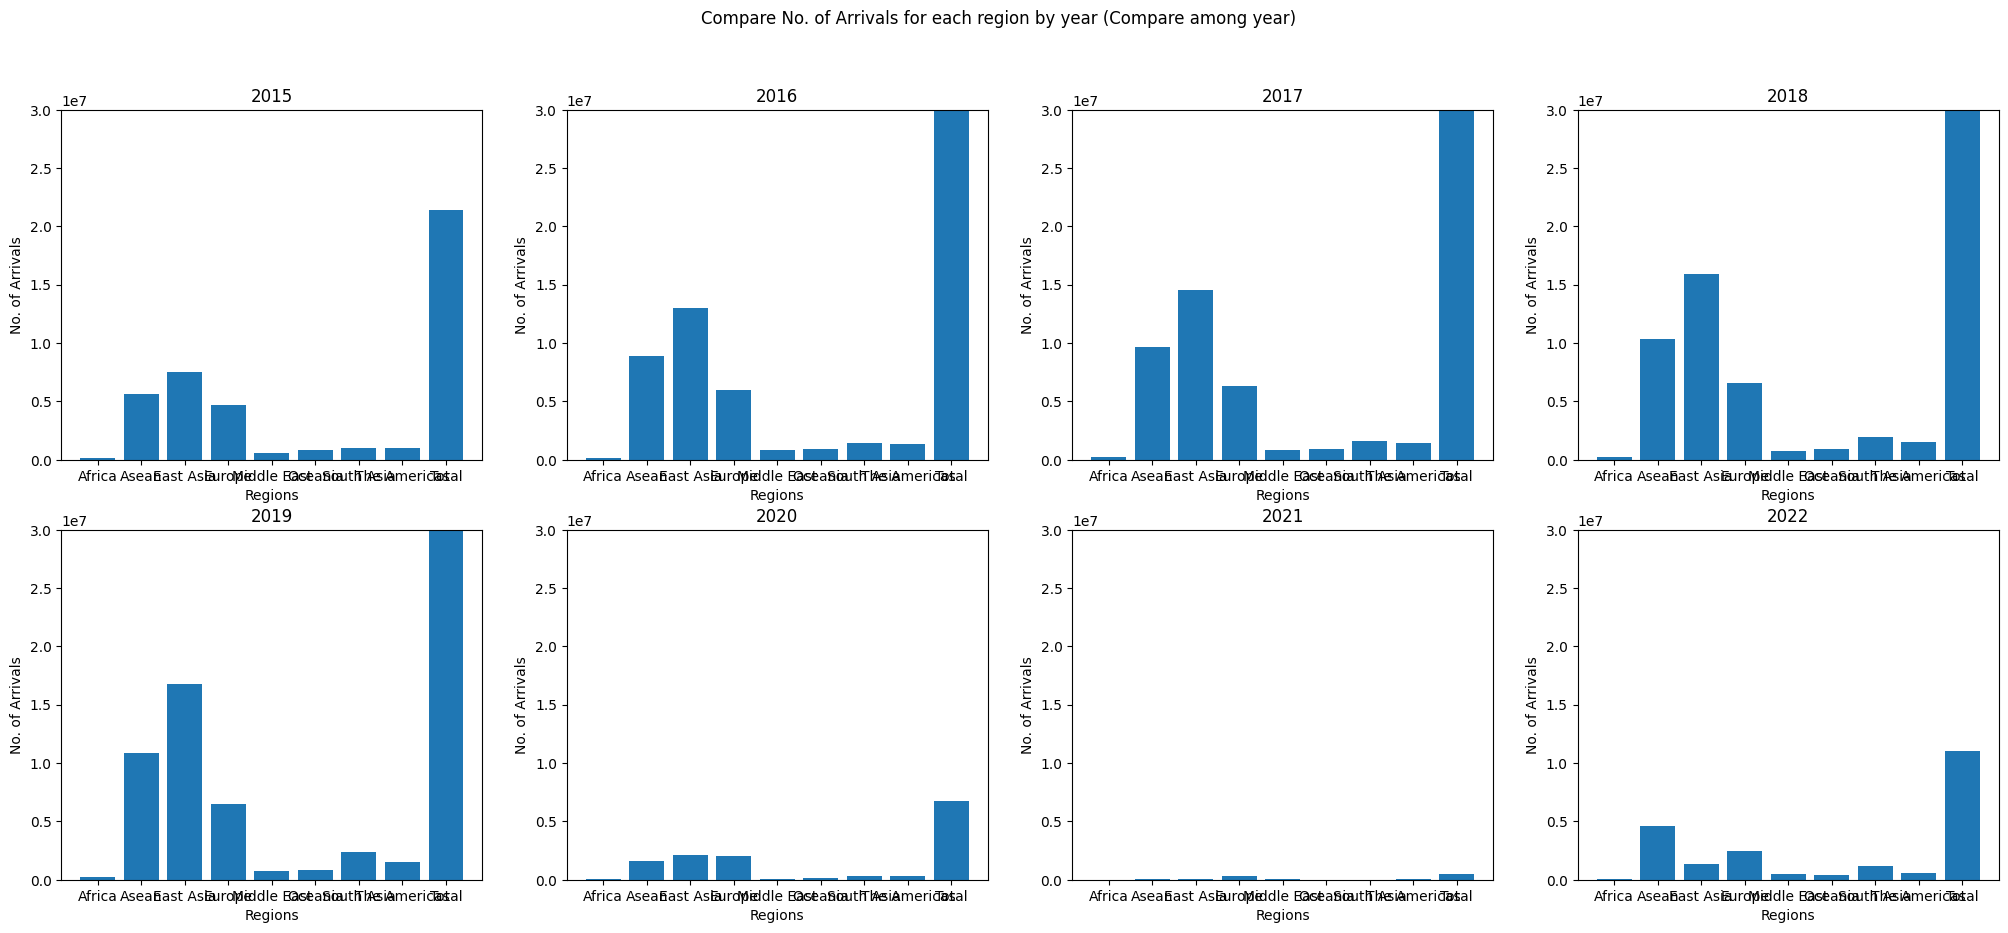

In [30]:

plt.figure(figsize=(35, 18))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
i=0
year=2015
for df in dfList:
    row = i // 4
    col = i % 4
    region_totals = df.groupby("Region")["No. of Arrivals"].sum()
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(region_totals.index, region_totals.values)
    axes[row, col].set_xlabel("Regions")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(year)
    i+=1
    year+=1
# fig.tight_layout()
plt.suptitle('Compare No. of Arrivals for each region by year')
plt.show()


plt.figure(figsize=(30, 18))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
i=0
year=2015
for df in dfList:
    row = i // 4
    col = i % 4
    region_totals = df.groupby("Region")["No. of Arrivals"].sum()
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(region_totals.index, region_totals.values)
    axes[row, col].set_xlabel("Regions")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(year)
    axes[row, col].set_ylim(0, 30000000)
    i+=1
    year+=1
# fig.tight_layout()
plt.suptitle('Compare No. of Arrivals for each region by year (Compare among year)')
plt.show()

<Figure size 3500x1800 with 0 Axes>

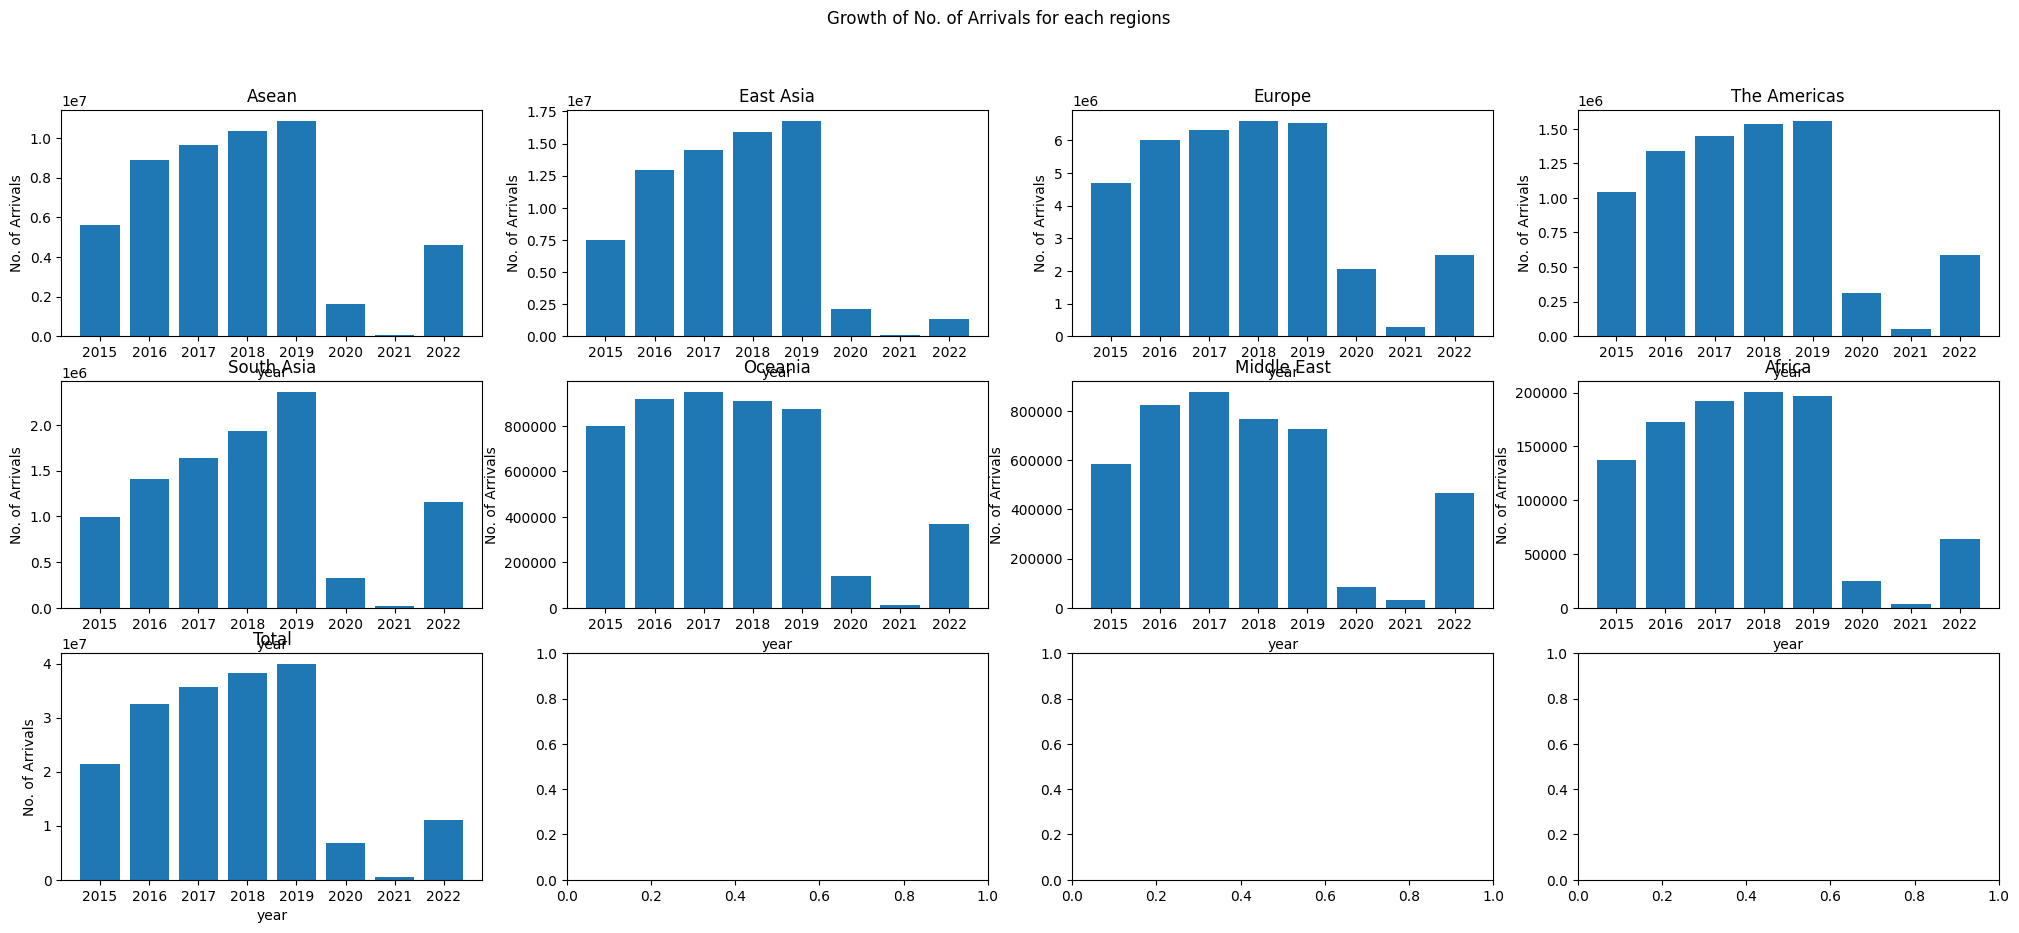

<Figure size 3500x1800 with 0 Axes>

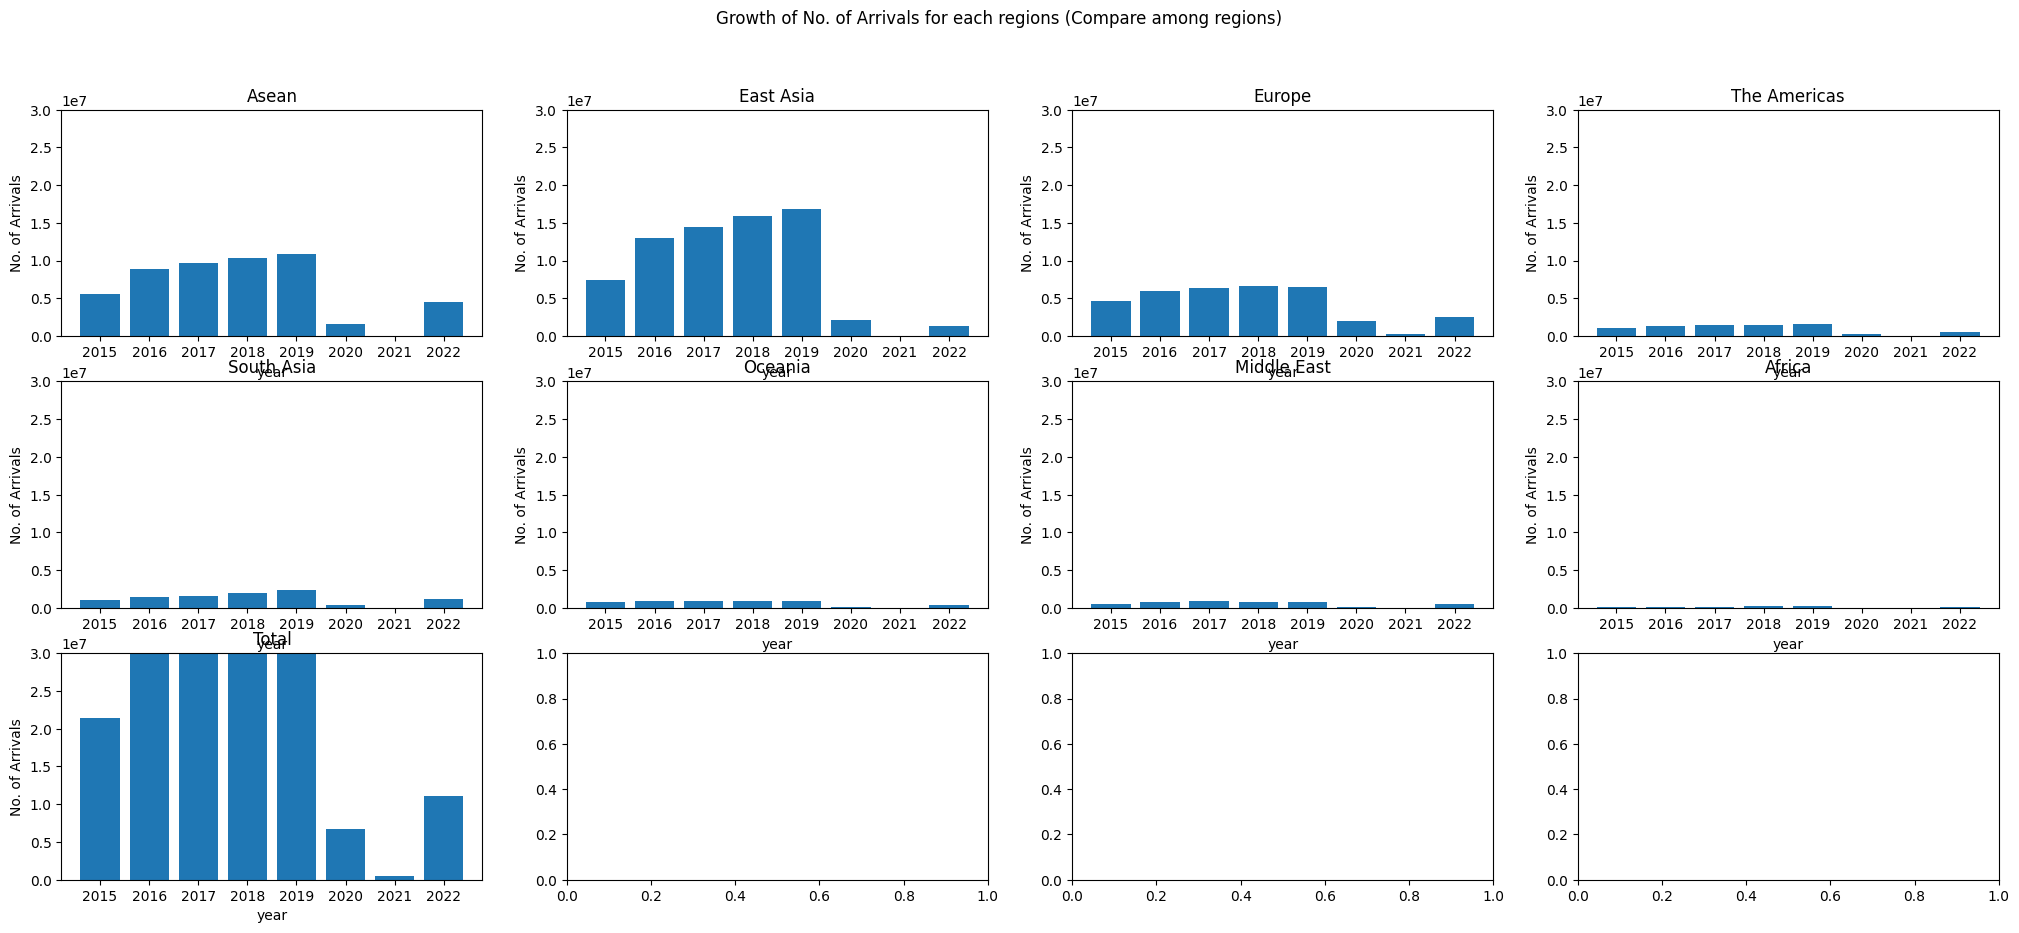

In [31]:
plt.figure(figsize=(35, 18))


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 10))

i=0
for region in Regions:
    row = i // 4
    col = i % 4
    df = dfNationality[dfNationality["Region"] == region]
    year_totals = df.groupby("year")["No. of Arrivals"].sum()
    # year_totals = year_totals.filter(like=region)
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(year_totals.index, year_totals.values)
    axes[row, col].set_xlabel("year")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(region)
    # axes[row, col].set_ylim(0, 30000000)
    i+=1
plt.suptitle('Growth of No. of Arrivals for each regions')
plt.show()


plt.figure(figsize=(35, 18))


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 10))
i=0
for region in Regions:
    row = i // 4
    col = i % 4
    df = dfNationality[dfNationality["Region"] == region]
    year_totals = df.groupby("year")["No. of Arrivals"].sum()
    # year_totals = year_totals.filter(like=region)
    # axes[row, col].figure(figsize=(20, 12))
    axes[row, col].bar(year_totals.index, year_totals.values)
    axes[row, col].set_xlabel("year")
    axes[row, col].set_ylabel("No. of Arrivals")
    axes[row, col].set_title(region)
    axes[row, col].set_ylim(0, 30000000)
    i+=1

plt.suptitle('Growth of No. of Arrivals for each regions (Compare among regions)')
plt.show()

In [32]:
NumToCountry = {}
CountryToNum = {}
NumToRegion = {}
RegionToNum = {}
YearToNum = {}
NumToYear = {}
YearsQ = dfQuart['Year'].unique().tolist()
print(YearsQ)
print(Countries)
CountriesQ = dfQuart['Country of Residence'].unique().tolist()
RegionQ = dfQuart['Region'].unique().tolist()

for i, country in enumerate(Countries, start=1):
    NumToCountry[i] = country
    CountryToNum[country] = i

for i, region in enumerate(Regions, start=1):
    NumToRegion[i] = region
    RegionToNum[region] = i

for i, year in enumerate(YearsQ, start=1):
    NumToYear[i] = year
    YearToNum[region] = i


def g(country):
    return CountryToNum.get(country, np.nan)

def h(region):
    return RegionToNum.get(region, np.nan)

def f(year):
    return YearToNum.get(year, np.nan)

dfNationality['Country of Residence'] = dfNationality['Country of Residence'].apply(g)
dfNationality['Region'] = dfNationality['Region'].apply(h)

dfQuart['Country of Residence'] = dfQuart['Country of Residence'].apply(g)
dfQuart['Region'] = dfQuart['Region'].apply(h)
dfQuart['Year'] = dfQuart['Year'].apply(f)
dfQuart
print(YearsQ)

[' Q1/2020 ', 'Q2/2020', 'Q3/2020', 'Q4/2020', 'Q1/2021', 'Q2/2021', 'Q3/2021', 'Q4/2021']
['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Vietnam', 'China', 'Hong Kong', 'Japan', 'Korea', 'Taiwan', 'Others in East Asia', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Italy', 'Netherlands', 'Norway', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'East Europe', 'Others in Europe', 'Argentina', 'Brazil', 'Canada', 'USA', 'Others  in America', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka', 'Others in South Asia', 'Australia', 'New Zealand', 'Others  in Ociania', 'Egypt', 'Israel', 'Kuwait', 'Saudi Arabia', 'U.A.E.', 'Others in Middle East', 'South  Africa', 'Others in Africa', 'Other']
[' Q1/2020 ', 'Q2/2020', 'Q3/2020', 'Q4/2020', 'Q1/2021', 'Q2/2021', 'Q3/2021', 'Q4/2021']


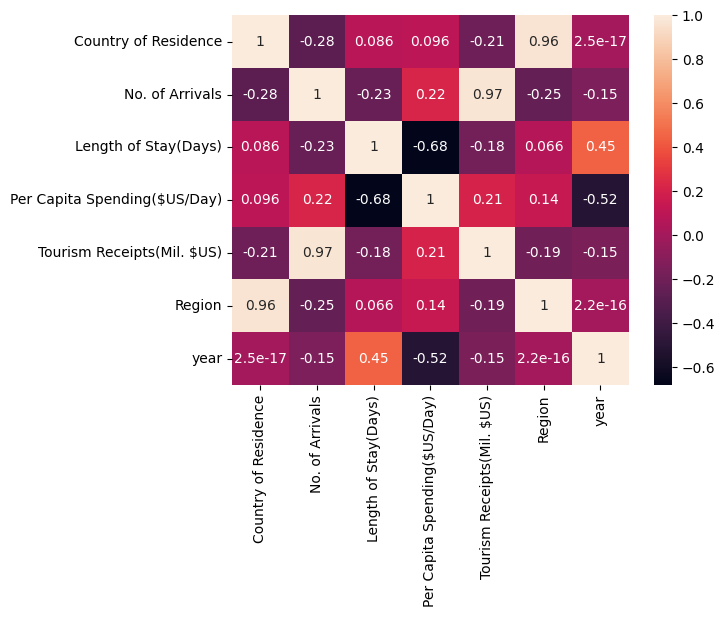

'\nyearly\n\n'

In [33]:
import seaborn as sns


dfNationalityWithoutTotal = dfNationality[dfNationality['Region'] != 9]
sns.heatmap(dfNationalityWithoutTotal.corr(), annot=True)
plt.show()

"""
yearly

"""

## model(prepare)

In [34]:
X = dfNationality[["Country of Residence", 'Length of Stay(Days)', 'Per Capita Spending($US/Day)',
                   'Tourism Receipts(Mil. $US)', 'Region', 'year']]
y = dfNationality["No. of Arrivals"]
country = CountryToNum["Japan"]
length_of_stay = 7
per_capita_spending_usd = 100
tourism_receipts_usd = 200000
region = RegionToNum["East Asia"]
year = 2023
predVal = [country, length_of_stay, per_capita_spending_usd,
            tourism_receipts_usd, region, year]
# pd.set_option('display.max_rows', None)
# print(X)

In [35]:
n_list = []
for i in range(1, 11):
    n_list.append(3 + 30*i)

testDf = dfNationalityWithoutTotal.iloc[n_list]
testDf

,Country of Residence,No. of Arrivals,Length of Stay(Days),Per Capita Spending($US/Day),Tourism Receipts(Mil. $US),Region,year
33,34,185736,18.27,130.14,441.62,4,2015
64,11,732417,6.31,182.06,841.40,2,2016
94,41,67876,7.14,167.98,81.41,5,2016
125,18,157923,16.45,155.33,403.51,3,2017
155,48,80895,13.88,219.54,246.50,7,2017
186,25,1466457,16.92,131.01,3250.64,3,2018
217,2,925437,7.39,184.97,1264.99,1,2019
247,32,28183,14.07,146.13,57.94,4,2019
278,9,131308,11.53,119.24,206.67,1,2020
308,39,10396,11.61,137.45,18.08,5,2020


In [36]:
testVals = []
testAns = []
# print(dfNationality[0])
for row in testDf.iterrows():

    country = row[1][0]
    length_of_stay = row[1][2]
    per_capita_spending_usd = row[1][3]
    tourism_receipts_usd = row[1][4]
    region = row[1][5]
    year = row[1][6]
    testVal = [country, length_of_stay, per_capita_spending_usd,
                        tourism_receipts_usd, region, year]
    testVals.append(testVal)
    testAns.append(row[1][1])

testVals

[[34.0, 18.27, 130.14, 441.62, 4.0, 2015.0],
 [11.0, 6.31, 182.06, 841.4, 2.0, 2016.0],
 [41.0, 7.14, 167.98, 81.41, 5.0, 2016.0],
 [18.0, 16.45, 155.33, 403.51, 3.0, 2017.0],
 [48.0, 13.88, 219.54, 246.5, 7.0, 2017.0],
 [25.0, 16.92, 131.01, 3250.64, 3.0, 2018.0],
 [2.0, 7.39, 184.97, 1264.99, 1.0, 2019.0],
 [32.0, 14.07, 146.13, 57.94, 4.0, 2019.0],
 [9.0, 11.53, 119.24, 206.67, 1.0, 2020.0],
 [39.0, 11.61, 137.45, 18.08, 5.0, 2020.0]]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## model(Regression)

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
#Linear Regression
LRModel = LinearRegression()
LRModel.fit(X, y)
x_pred = np.array([predVal])


LR_pred = LRModel.predict(x_pred)
print(LR_pred)

[1.32694258e+08]


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {
    'poly_features__degree': np.arange(2, 10)
}

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best degree:", grid_search.best_params_['poly_features__degree'])

In [41]:
# poly = PolynomialFeatures(degree=grid_search.best_params_['poly_features__degree'])

# X_poly = poly.fit_transform(X)

# PRModel = LinearRegression()
# PRModel.fit(X_poly, y)

# x_pred = poly.fit_transform(x_pred)

# PR_pred = PRModel.predict(x_pred)
# print(PR_pred)

In [42]:
#test Linear Socre
testPred = []
for testVal in testVals:
    x_pred = np.array([testVal])
    testPred.append(LRModel.predict(x_pred))

mse = mean_squared_error(testAns, testPred)
r2 = r2_score(testAns, testPred)
# print(testAns)
# print(testPred)
# print(testVals)
# testDf
print(mse)
print(r2)

51143731434.42257
0.7673425908892968


In [43]:
# #test Polynomial Socre

# testPred = []
# for testVal in testVals:
#     x_pred = np.array([testVal])
#     x_pred = poly.fit_transform(x_pred)
#     testPred.append(PRModel.predict(x_pred))

# mse = mean_squared_error(testAns, testPred)
# r2 = r2_score(testAns, testPred)
# # print(testAns)
# # print(testPred)
# # print(testVals)
# # testDf
# print(mse)
# print(r2)

1
51143731434.42278
0.7673425908892959
2
21863154033.14175
0.9005425566403745
3
648757405.0857316
0.9970487445328042
4
660099793.5882146
0.9969971469929279
5
63775572.34358026
0.9997098792166732


6
432885658.1869526
0.9980307644192115
7
199705887.56318384
0.9990915200537493
8
3791665838.070441
0.9827513729374605
9
4037582648.427565
0.9816326753698452


Text(0, 0.5, 'R2')

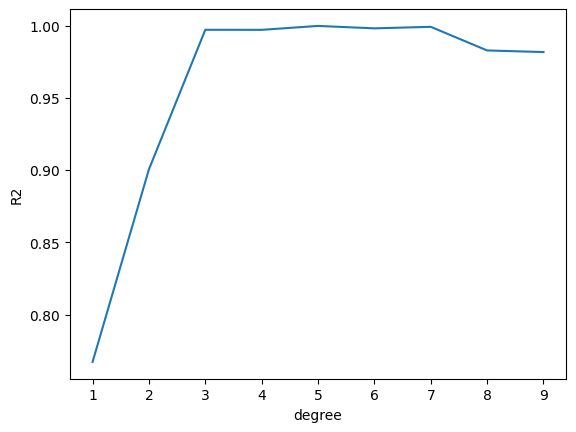

In [44]:
polyNum = []
r2Result = []

for i in range(1, 10):
    
    poly = PolynomialFeatures(degree=i)

    X_poly = poly.fit_transform(X)

    PRModel = LinearRegression()
    PRModel.fit(X_poly, y)

    # x_pred = poly.fit_transform(x_pred)

    # PR_pred = PRModel.predict(x_pred)

    testPred = []
    for testVal in testVals:
        x_pred = np.array([testVal])
        x_pred = poly.fit_transform(x_pred)
        testPred.append(PRModel.predict(x_pred))

    mse = mean_squared_error(testAns, testPred)
    r2 = r2_score(testAns, testPred)

    polyNum.append(i)
    r2Result.append(r2)
    print(i)
    print(mse)
    print(r2)

import matplotlib.pyplot as plt

plt.plot(polyNum, r2Result)
plt.xlabel("degree")
plt.ylabel("R2")

---------------------------------------------------------------------
degree : 1
MSE : 209271957338.36282
R2 : 0.99107176779673
---------------------------------------------------------------------
degree : 2
MSE : 31796537149.6814
R2 : 0.9986434548109413
---------------------------------------------------------------------
degree : 3
MSE : 82902103093.9258
R2 : 0.9964631227424071
---------------------------------------------------------------------
degree : 4
MSE : 44267879088325.945
R2 : -0.888613785973321
---------------------------------------------------------------------
degree : 5
MSE : 1558738252406487.0
R2 : -65.50091698192944
---------------------------------------------------------------------
degree : 6
MSE : 1.3063436796392546e+19
R2 : -557328.3171925287
---------------------------------------------------------------------
degree : 7
MSE : 1.67089402876659e+23
R2 : -7128585245.500504
---------------------------------------------------------------------
degree : 8
MSE : 8.2

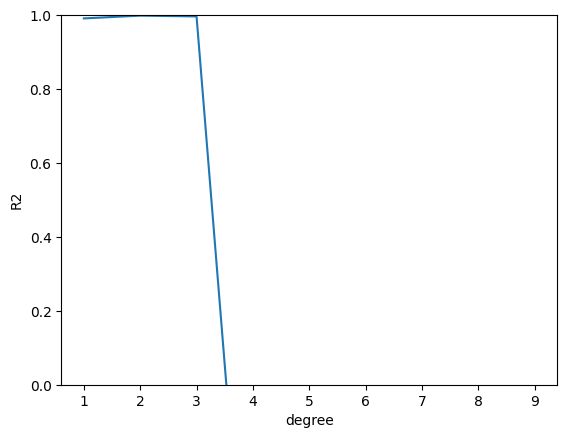

In [45]:
polyNum = []
r2Result = []

for i in range(1, 10):
    
    poly = PolynomialFeatures(degree=i)

    X_poly = poly.fit_transform(X_train)

    PRModel = LinearRegression()
    PRModel.fit(X_poly, y_train)

    # x_pred = poly.fit_transform(x_pred)

    # PR_pred = PRModel.predict(x_pred)

    # testPred = []
    # for testVal in X_test:
    #     x_pred = np.array([testVal])
    #     x_pred = poly.fit_transform(x_pred)
    #     testPred.append(PRModel.predict(x_pred))
    X_polyTest = poly.fit_transform(X_test)
    x_pred = PRModel.predict(X_polyTest)
    mse = mean_squared_error(y_test, x_pred)
    r2 = r2_score(y_test, x_pred)

    polyNum.append(i)
    r2Result.append(r2)
    print('---------------------------------------------------------------------')
    print(f"degree : {i}")
    print(f"MSE : {mse}")
    print(f"R2 : {r2}")

import matplotlib.pyplot as plt

plt.plot(polyNum, r2Result)
plt.xlabel("degree")
plt.ylabel("R2")
plt.ylim(0, 1)
plt.show()

In [46]:
X = dfQuart[["Country of Residence", 'Length of Stay(Days)', 'Per Capita Spending($US/Day)',
                   'Tourism Receipts(Mil. $US)', 'Region', 'Year']]
y = dfQuart["No. of Arrivals"]
country = CountryToNum["Japan"]
length_of_stay = 7
per_capita_spending_usd = 100
tourism_receipts_usd = 200000
region = RegionToNum["East Asia"]
year = 2023
predVal = [country, length_of_stay, per_capita_spending_usd,
            tourism_receipts_usd, region, year]
dfQuart

,Country of Residence,No. of Arrivals,Length of Stay(Days),Per Capita Spending($US/Day),Tourism Receipts(Mil. $US),Region,Year
0,1.0,2435,9.48,"7,147.43",164.99,1,NaN
1,2.0,163370,8.30,"7,105.47",9634.81,1,NaN
2,3.0,96781,6.12,"4,340.94",2571.13,1,NaN
3,4.0,382215,4.97,"6,196.30",11770.54,1,NaN
4,5.0,612688,4.86,"4,298.47",12799.37,1,NaN
...,...,...,...,...,...,...,...
419,49.0,457,20.05,"3,599.96",32.99,7,NaN
420,50.0,3091,13.90,"3,366.68",144.62,7,NaN
421,51.0,5562,26.04,"6,086.69",881.42,7,NaN
422,52.0,598,43.42,"3,472.73",90.18,8,NaN


In [5]:
dfQuart = pd.read_csv('Data2/TourismArrival2020-2021(Quarterly).csv')
CountryToRegion = {}
for i, row in dfQuart.iterrows():
    if row['Country'] not in CountryToRegion:
        
        CountryToRegion[row['Country']] = row['Region']


CountryToRegion

{'Brunei': 'Asean',
 'Cambodia': 'Asean',
 'Indonesia': 'Asean',
 'Laos': 'Asean',
 'Malaysia': 'Asean',
 'Myanmar': 'Asean',
 'Philippines': 'Asean',
 'Singapore': 'Asean',
 'Vietnam': 'Asean',
 'China': 'East Asia',
 'Hong Kong': 'East Asia',
 'Japan': 'East Asia',
 'Korea': 'East Asia',
 'Taiwan': 'East Asia',
 'Others in East Asia': 'East Asia',
 'Austria': 'Europe',
 'Belgium': 'Europe',
 'Denmark': 'Europe',
 'Finland': 'Europe',
 'France': 'Europe',
 'Germany': 'Europe',
 'Italy': 'Europe',
 'Netherlands': 'Europe',
 'Norway': 'Europe',
 'Russia': 'Europe',
 'Spain': 'Europe',
 'Sweden': 'Europe',
 'Switzerland': 'Europe',
 'United Kingdom': 'Europe',
 'East Europe': 'Europe',
 'Others in Europe': 'Europe',
 'Argentina': 'The Americas',
 'Brazil': 'The Americas',
 'Canada': 'The Americas',
 'USA': 'The Americas',
 'Others  in America': 'The Americas',
 'Bangladesh': 'South Asia',
 'India': 'South Asia',
 'Nepal': 'South Asia',
 'Pakistan': 'South Asia',
 'Sri Lanka': 'South Asia